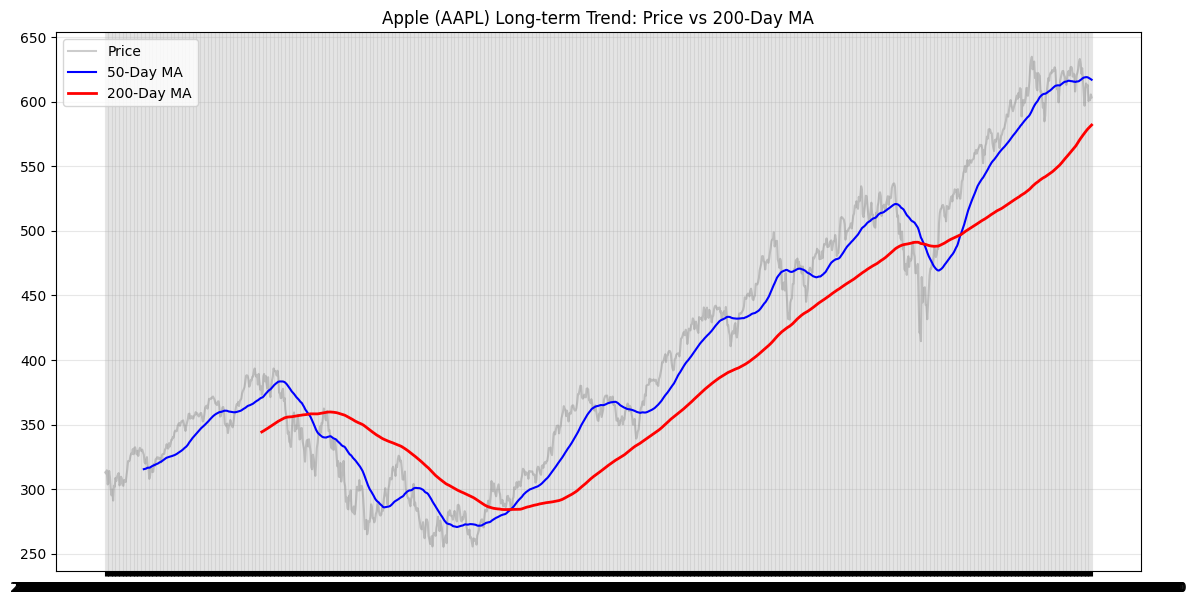

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load a specific ticker (e.g., AAPL)
df = pd.read_csv("../data/raw/AAPL.csv", index_col='Date', parse_dates=True)

# 2. Robust Cleaning
# Forward fill missing prices and drop any remaining rows with no data
df = df.ffill().dropna()

# 3. Calculate Moving Averages
df['50_MA'] = df['Close'].rolling(window=50).mean()   # Short-term trend
df['200_MA'] = df['Close'].rolling(window=200).mean() # Long-term trend

# 4. Visualization
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Price', alpha=0.4, color='gray')
plt.plot(df['50_MA'], label='50-Day MA', color='blue', linewidth=1.5)
plt.plot(df['200_MA'], label='200-Day MA', color='red', linewidth=2)

plt.title('Apple (AAPL) Long-term Trend: Price vs 200-Day MA')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
import pandas as pd
import numpy as np

def clean_financial_data(df, ticker_name):
    print(f"🧹 Cleaning data for {ticker_name}...")
    
    # 1. Check for missing values
    missing_count = df.isnull().sum().sum()
    if missing_count > 0:
        print(f"⚠️ Found {missing_count} missing values in {ticker_name}. Fixing...")
        
        # 'ffill' (forward fill) carries the last valid price into the gap
        # This is standard for stock prices because the value hasn't changed
        df = df.ffill()
        
    # 2. Remove duplicates (in case of API double-pulls)
    df = df[~df.index.duplicated(keep='first')]
    
    # 3. Handle outliers (e.g., zero prices or negative prices which are errors)
    df = df[df['Close'] > 0]
    
    return df

# Example usage in your loop:
# cleaned_df = clean_financial_data(df, ticker)

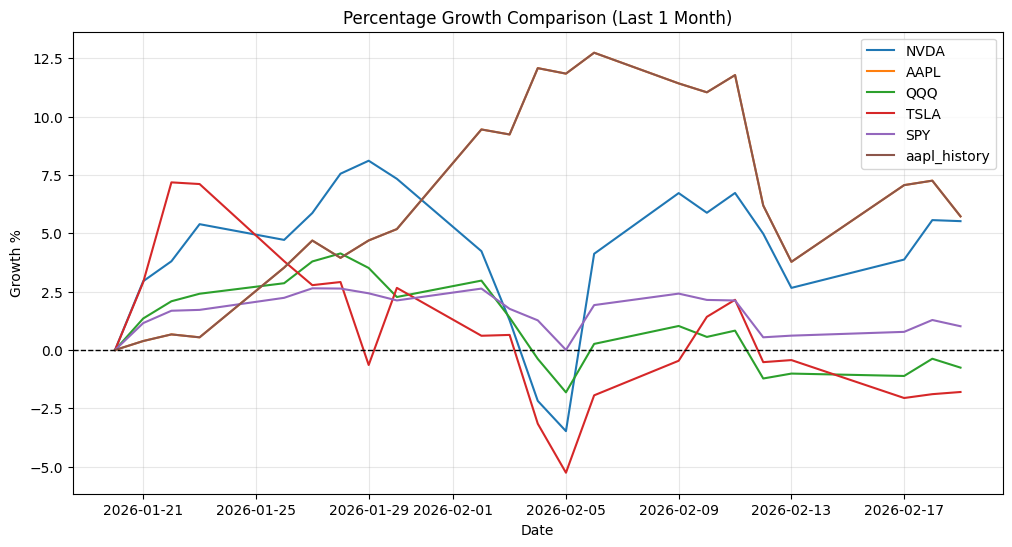

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 1. Find all CSVs in our raw data folder
files = glob.glob("../data/raw/*.csv")

plt.figure(figsize=(12, 6))

for file in files:
    # Get the ticker name from the filename
    ticker = file.split('/')[-1].replace('.csv', '')
    
    # Load data
    df = pd.read_csv(file, index_col='Date', parse_dates=True)
    
    # Calculate Percentage Change from the start of the month
    # Formula: ((Current Price / Starting Price) - 1) * 100
    initial_price = df['Close'].iloc[0]
    pct_growth = ((df['Close'] / initial_price) - 1) * 100
    
    # Plot the growth
    plt.plot(pct_growth, label=f'{ticker}')

# 3. Formatting the "Robust" Chart
plt.title('Percentage Growth Comparison (Last 1 Month)')
plt.ylabel('Growth %')
plt.xlabel('Date')
plt.axhline(0, color='black', linewidth=1, linestyle='--') # Baseline
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()